In [2]:
# # 이미지 png로 변환
# import mritopng
# mritopng.convert_folder('./Chest_Xray/train/', './Chest_Xray/png/train/')

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './Chest_Xray/png/train/'

In [1]:
import albumentations as A
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import pandas as pd
import numpy as np
import random
import os

from pydicom import dcmread
import pydicom
import pylibjpeg

from keras.utils import np_utils

import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
train_data_df = pd.read_csv('./Chest_Xray/train.csv')
train_data_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [3]:
train_img_path = './Chest_Xray/png/'
img_path = []
for i in train_data_df['image_id']:
    img_path.append(train_img_path + i+'.png')

train_data_df['img_path'] = img_path
train_data_df[:3]

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,img_path
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,./Chest_Xray/png/50a418190bc3fb1ef1633bf967892...
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,./Chest_Xray/png/21a10246a5ec7af151081d0cd6d65...
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,./Chest_Xray/png/9a5094b2563a1ef3ff50dc5c7ff71...


In [11]:
import cv2

def plus_w_h(x) :
    out = []
    for i in x :
        result = cv2.imread(i)
        out = result.shape[0]
    return out

train_data_df['height'] = '0'
train_data_df['height'] = train_data_df['img_path'].apply(plus_w_h)

AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
#albumentations Module 설정.
IMAGE_SHAPE = [512, 512]
transforms_train = A.Compose([
    A.Resize(height=IMAGE_SHAPE[0], width=IMAGE_SHAPE[1], p=1.0),
])

transforms_valid = A.Compose([
    A.Resize(height=IMAGE_SHAPE[0], width=IMAGE_SHAPE[1], p=1.0)
])

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

images = train_data_df['img_path']
labels = list(np_utils.to_categorical(train_data_df['class_id'], 15))

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.3, random_state=121, stratify=labels)
print(f'train image count : {train_images.shape[0]}')
print(f'val image count : {val_images.shape[0]}')

train image count : 47539
val image count : 20375


In [5]:
print(train_images.iloc[0])
print(val_images.iloc[0])

./Chest_Xray/train/2cf24e4b4380252c4dc94a0e63bed062.dicom
./Chest_Xray/train/1085585ceaf60941fd14db7ad3bb2f49.dicom


In [6]:
val_labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

(2580, 2332)
(2844, 2232)


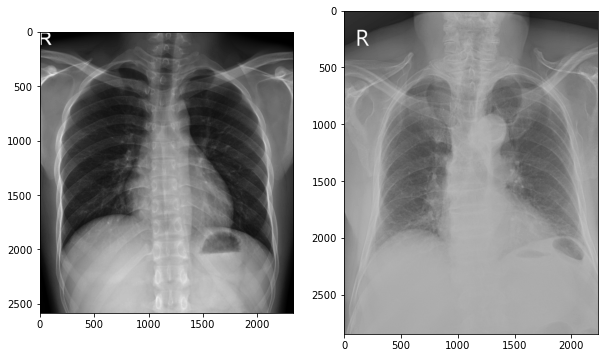

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs = axs.flatten()

img_test = pydicom.dcmread(train_images[0])
img_test = img_test.pixel_array
axs[0].imshow(img_test, cmap='gray')
print(img_test.shape)

img_test = pydicom.dcmread(val_images.iloc[0])
img_test= img_test.pixel_array
axs[1].imshow(img_test, cmap='gray')
print(img_test.shape)

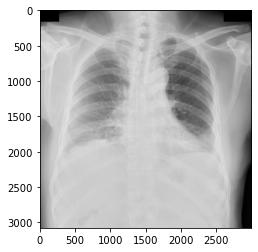

In [123]:
import cv2

# img0 = cv2.imread(train_df.iloc[i].img_path)
# img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img_test = cv2.imread("./Chest_Xray/png/00aca42a24e4ea6066cca2546150c36e.png")
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
# img_test = img_test.pixel_array
img_test.shape
plt.imshow(img_test)

In [124]:
class Classification_Dataset:
    # class_list -> image_labels 변경
    def __init__(self, image_paths = "", one_hot_label = None, integers_label = None, target_size = None, augment = None):
        
        self.image_list = image_paths
        self.one_hot_label = one_hot_label
        self.integers_label = integers_label
        self.target_size = target_size
        self.augment = augment
    
    def __len__(self):
        if self.one_hot_label:
            return len(self.image_list)
        elif self.integers_label:
            return len(self.integers_label)

    def __getitem__(self, idx):
        # ds = pydicom.dcmread(self.image_list.iloc[idx])
        # image = ds.pixel_array.astype(np.int32)
        image = cv2.imread(self.image_list.iloc[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image/255.0
        
        label = self.one_hot_label[idx]

        transformed = self.augment(image=image)
        image = transformed['image']

        return image, label

In [125]:
from tensorflow.keras.utils import Sequence
import tensorflow as tf

class Classification_Data_Loader(Sequence):

    def __init__(self, dataset, batch_size=None, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle=shuffle
        self.index_list = [idx for idx in range(len(self.dataset))]
        self.idx = 0
        
    def __getitem__(self, idx):
        start = idx * self.batch_size
        end = (idx+1) * self.batch_size
        data = []
        label = []
        A = []
        
        if self.shuffle:
            np.random.shuffle(self.index_list)
            
        for j in range(start,end):
            if j >= len(self.index_list):
                j%=len(self.dataset)
            data.append(self.dataset[self.index_list[j]])
        
        batch = tuple(tf.stack(sample, axis=0) for sample in zip(*data))
        
        if self.idx >= (len(self.dataset)//self.batch_size):
            self.idx=0
        self.idx +=1
        
        return batch

    def __call__(self):
        batch = self.__getitem__(self.idx)
        return batch

    def __len__(self):
        return (len(self.dataset) // self.batch_size)

    def get_batch(self):
        return self.batch_size

In [126]:
train_dataset = Classification_Dataset(image_paths=train_images, one_hot_label = train_labels, augment = transforms_train)
valid_dataset = Classification_Dataset(image_paths=val_images, one_hot_label = val_labels, augment = transforms_valid)

train_data_gen = Classification_Data_Loader(dataset=train_dataset, batch_size=3, shuffle=True)
valid_data_gen = Classification_Data_Loader(dataset=valid_dataset, batch_size=33, shuffle=True)

images, labels = train_data_gen.__getitem__(0)
print(images.shape)
print(labels)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label : tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 0. 0.]]], shape=(1, 15, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


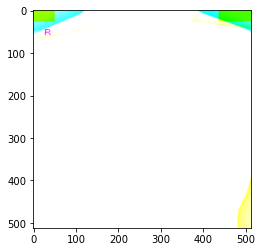

In [80]:
# 데이터 로더 동작 확인
def data_info_print(data_gen, idx):
    batch = data_gen.__getitem__(idx)
    for i in range(len(batch[0])): 
        plt.imshow(batch[0][i])
        
    print('label :', batch[1])
    print(type(batch[0][0]), type(batch[1][0]))
    
data_info_print(train_data_gen,0)

In [25]:
def fit_test(model, train_gen, train_steps, epochs, val_gen, val_steps):
    BATCH_SIZE = 3
  # define loss and optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.000001)
    loss_func = keras.losses.CategoricalCrossentropy()

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

    valid_loss = tf.keras.metrics.Mean(name='valid_loss')
    valid_accuracy = tf.keras.metrics.CategoricalAccuracy(name='valid_accuracy')

    train_losses = []
    train_acces = []
    val_losses = []
    val_acces = []

    @tf.function
    def train_step(images, labels):
        with tf.GradientTape() as tape:
            predictions = model(images, training=True)
            loss = loss_func(y_true=labels, y_pred=predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(grads_and_vars=zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_accuracy(labels, predictions)

    @tf.function
    def valid_step(images, labels):

        predictions = model(images, training=False)
        v_loss = loss_func(labels, predictions)

        valid_loss(v_loss)
        valid_accuracy(labels, predictions)

    def step_decay(epoch, train_accuracy):
        if epoch <= 1:
            return True

        if 0.950 > train_accuracy > 0.880 :
            optimizer.learning_rate = 0.0001
            print("lr : ", optimizer.learning_rate)

        if train_accuracy > 0.950 :
            optimizer.learning_rate = 0.00001
            print("lr : ", optimizer.learning_rate)

  # start training
    for epoch in range(epochs):
        train_loss.reset_states()
        train_accuracy.reset_states()
        valid_loss.reset_states()
        valid_accuracy.reset_states()
        #step = 0
        for step in range(train_steps):
            print('.',end='')
            if step % 100 == 0:
                print()
            images, labels = train_gen.__getitem__(0)
            train_step(images, labels)
            
        print('x')
        
        for val_step in range(val_steps):
            print('.', end='')
            if val_step % 100 == 0:
                print()
            valid_images, valid_labels = val_gen()
            valid_step(valid_images, valid_labels)
        print('x')
        print("Epoch: {}/{}, train loss: {:.5f}, train accuracy: {:.5f}, "
              "valid loss: {:.5f}, valid accuracy: {:.5f}".format(epoch + 1,
                                                                epochs,
                                                                train_loss.result(),
                                                                train_accuracy.result(),
                                                                valid_loss.result(),
                                                                valid_accuracy.result()))
        #step_decay(epoch, train_accuracy.result())

        train_losses.append(train_loss.result())
        train_acces.append(train_accuracy.result())
        val_losses.append(valid_loss.result())
        val_acces.append(valid_accuracy.result())

    history = {'train_losses': train_losses, 'train_acces': train_acces, 'val_losses': val_losses, 'val_acces': val_acces}
    return history

In [26]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Input, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

input_tensor = Input(shape=(512, 512, 3), name='input')

def vgg16_model(input_data):
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input_data)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(2048, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)
    
    return Model(input_data, x)

In [27]:
vgg16 = vgg16_model(input_tensor)

optimizer = optimizers.SGD(lr=0.001, momentum=0.9)

vgg16.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 512, 512, 64)      1792      
                                                                 
 conv2d_18 (Conv2D)          (None, 512, 512, 64)      36928     
                                                                 
 batch_normalization_6 (Batc  (None, 512, 512, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 256, 256, 64)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 256, 256, 128)     7385

In [79]:
from tensorflow import keras

history = fit_test(
    model = vgg16, 
    train_gen = train_data_gen, 
    train_steps=80, 
    epochs=100, 
    val_gen=valid_data_gen, 
    val_steps=20
)

.


ValueError: in user code:

    File "C:\Users\admin\AppData\Local\Temp\ipykernel_2884\858217999.py", line 22, in train_step  *
        loss = loss_func(y_true=labels, y_pred=predictions)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__  **
        losses = call_fn(y_true, y_pred)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (1, 15, 3) and (1, 1) are incompatible


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(units=512, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(units=3, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [78]:
import tensorflow as tf
tf.executing_eagerly()
# tf.compat.v1.disable_eager_execution()

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

# generator : 제너레이터를 설정
h1 = model1.fit_generator(generator=train_data_gen, epochs=30, validation_data=valid_data_gen)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/remove_squeezable_dimensions/Squeeze' defined at (most recent call last):
    File "C:\Users\admin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\admin\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\admin\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\admin\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\admin\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\admin\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\admin\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_2884\1151612266.py", line 8, in <cell line: 8>
      h1 = model1.fit_generator(generator=train_data_gen, epochs=30, validation_data=valid_data_gen)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\losses.py", line 265, in call
      y_pred, y_true = losses_utils.squeeze_or_expand_dimensions(
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\utils\losses_utils.py", line 200, in squeeze_or_expand_dimensions
      y_true, y_pred = remove_squeezable_dimensions(y_true, y_pred)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\utils\losses_utils.py", line 139, in remove_squeezable_dimensions
      labels = tf.squeeze(labels, [-1])
Node: 'categorical_crossentropy/remove_squeezable_dimensions/Squeeze'
Can not squeeze dim[2], expected a dimension of 1, got 3
	 [[{{node categorical_crossentropy/remove_squeezable_dimensions/Squeeze}}]] [Op:__inference_train_function_5124]